In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

In [ ]:
%%bash
cd /content/drive/MyDrive/SergheiLabProjects/Sepsis_Tejas/GeneExpressionAnalysis_Python/CellCompositionData
ls

0_Scripts
Annotated Files
Cell_Predictions
CellTypePredictions+Meta_6Studies0912_2022.tsv
CellTypePredictions+Meta_6Studies0921_2022.tsv
foo.csv
Logistic  Regression.ipynb
LR_ Attempt 2
LR_ Cell composition data
Plots
Trial &error of LR_ Cell composition data


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression



##GUIDE
TrainingSet = read.csv(CellTypePredictions+Meta_6Studies-9-12.tsv, sep = "\t")
#Some lines of code to separate into X = cell type predictions and y = survival status

MyModel = LogisticRegression().fit(X, y)

TestDataset = read.csv("GSE27131Predictions.tsv",sep="\t")
#Again, split up into X1 = cell type predictions and y1 = survival status

Predictions = MyModel.predict(X)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from scipy.stats import random_correlation

In [ ]:
class genetestmodel():
  def __init__(self,path):
    self.df = pd.read_csv(path, dtype=object, sep='\t')
    

  def process_data(self):
    data = self.df.dropna(subset = ['Mortality'])

  #remove controls
    indexControl = data[data['Mortality'] == "Control"].index
    df1 = data.drop(indexControl)
    

  #survived
    df1.loc [(df1['Mortality'] =='Survivor'),'SurvivalStatus']= 1

  # dead
    df1.loc [(df1['Mortality'] =='NonSurvivor'),'SurvivalStatus']= 0

    #df2 = df1[['Cohort','Cell_Type','Source_name','Age', 'Gender','Mortality', 'SurvivalStatus', 'Sepsis_Type','MSC', 'Bronchial_Epithelial_cells', 'Fibroblasts', 'Endothelial_cells', 'Adipocytes', 'Keratinocytes', 'Schwann_cells', 'Smooth_muscle_cells', 'CD34+', 'Platelets', 'Monocytes_CD14+CD16-', 'Monocytes_CD16+CD14-', 'Macrophage', 'M1(IFNg)', 'M2(IL-4)', 'M(IFNa)', 'Dendritic_cells_(BDCA1+)', 'Dendritic_cells_(BDCA3+)', 'Dendritic_cells_(plasmacytoid+)', 'T_cells_(CD4+)', 'T_cells_(CD8+)', 'T_cells_(gamma-delta)', 'NK_cells', 'Neutrophils', 'Neutrophils_LPS', 'B_cells']]
    df2 = df1.iloc[:, 7:34]
    #for col in df2.columns:
    #  print(col)
    #print(df2)
    X=df2.iloc[:,0:25]

    y=df2.iloc[:,26]

    return(X,y)

  def train_test(self,X,y):
    #Split X and y into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.2,random_state=42)

  # instantiate the model (using the default parameters)
  # fit the model with data
    clf = LogisticRegression(penalty = "l2", C=10.0,solver= "newton-cg", fit_intercept = True, intercept_scaling=1, max_iter=100, tol= 0.0001,random_state= 42)
    clf.fit(X_train, y_train)
    scores= cross_val_score(clf,X_train, y_train, cv=5)
    print("cross-validated score", sum(scores)/5)

    print("score on test", clf.score(X_test, y_test))
    y_pred = clf.predict(X_test)
    print(y_pred)
    #Compute confusion matrix
    cm = confusion_matrix(y_test,y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=clf.classes_)
    disp.plot()
    plt.show()
    print(cm)


    return(clf, X_test)




cross-validated score 0.7389958108190153
score on test 0.7850877192982456
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


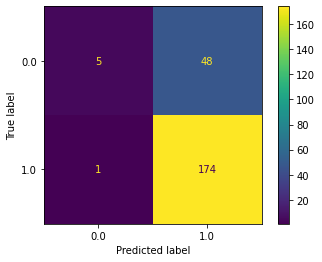

[[  5  48]
 [  1 174]]


In [ ]:
if __name__ == "__main__":
  obj = genetestmodel('/content/drive/MyDrive/SergheiLabProjects/Sepsis/Sepsis_Tejas/GeneExpressionAnalysis_Python/CellCompositionData/CellTypePredictions+Meta_6Studies0921_2022.tsv')
  #print(obj)
  X,Y = obj.process_data()
  clf,X = obj.train_test(X,Y)
  

In [ ]:
def load_data(path):
    df = pd.read_csv(path, sep= '\t')
    return(df)

def process_data(df):
  data = df.dropna(subset = ['Mortality'])
#remove controls
  indexControl = data[data['Mortality'] == "Control"].index
  df1 = data.drop(indexControl)
    

  #survived
  df1.loc [(df['Mortality'] =='Survivor'),'SurvivalStatus']= 1

  # dead
  df1.loc [(df['Mortality'] =='NonSurvivor'),'SurvivalStatus']= 0

    #df2 = df1[['Cohort','Cell_Type','Source_name','Age', 'Gender','Mortality', 'SurvivalStatus', 'Sepsis_Type','MSC', 'Bronchial_Epithelial_cells', 'Fibroblasts', 'Endothelial_cells', 'Adipocytes', 'Keratinocytes', 'Schwann_cells', 'Smooth_muscle_cells', 'CD34+', 'Platelets', 'Monocytes_CD14+CD16-', 'Monocytes_CD16+CD14-', 'Macrophage', 'M1(IFNg)', 'M2(IL-4)', 'M(IFNa)', 'Dendritic_cells_(BDCA1+)', 'Dendritic_cells_(BDCA3+)', 'Dendritic_cells_(plasmacytoid+)', 'T_cells_(CD4+)', 'T_cells_(CD8+)', 'T_cells_(gamma-delta)', 'NK_cells', 'Neutrophils', 'Neutrophils_LPS', 'B_cells']]
  df2 = df1.iloc[:, 7:34]
    #for col in df2.columns:
    #  print(col)
    #print(df2)
  X=df2.iloc[:,0:25]

  y=df2.iloc[:,26]

  return(X,y)

def train_test(X,y):
  #Split X and y into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.2)

  # instantiate the model (using the default parameters)
  # fit the model with data
  clf = LogisticRegression(penalty = "l2", C=10.0,solver= "newton-cg", fit_intercept = True, intercept_scaling=1, max_iter=100, tol= 0.0001,random_state= "Any") 
  clf.fit(X_train, y_train)
  scores= cross_val_score(clf,X_train, y_train, cv=5)
  print("cross-validated score", sum(scores)/5)

  print("score on test", clf.score(X_test, y_test))
  estimator
  #y_pred = clf.predict(X_test)
  #Compute confusion matrix
  #cm = confusion_matrix(y_test,y_pred)
  #print(cm)
  return(clf, X_test)

In [ ]:
def train_test(X,y):
  #Split X and y into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.2)

# instantiate the model (using the default parameters)
# fit the model with data
  clf = LogisticRegression(penalty = "l2", C=10.0,solver= "newton-cg")
  clf.fit(X_train, y_train)
  scores= cross_val_score(clf,X_train, y_train, cv=5)
  print("cross-validated score", sum(scores)/5)

  print("score on test", clf.score(X_test, y_test))
  #y_pred = clf.predict(X_test)
  #Compute confusion matrix
  #cm = confusion_matrix(y_test,y_pred)
  #print(cm)


  return(clf, X_test)


Parameters:

(A) Input:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.2, random_state=16)
clf = LogisticRegression(random_state=16)

Output Score:

cross-validated score 0.741187541740028
score on test 0.7456140350877193


(B) Input:
  X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.2)

  clf = LogisticRegression(penalty = "l2", C=10.0,solver= "newton-cg")6)

Output Score:

cross-validated score 0.741187541740028
score on test 0.7456140350877193

Grid Search

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
def load_data(path):
  df = pd.read_csv(path, sep= '\t')
  return(df)

In [ ]:
def process_data(df):
  data = df.dropna(subset = ['Mortality'])

#remove controls
  indexControl = data[data['Mortality'] == "Control"].index
  df1 = data.drop(indexControl)
  

#survived
  df1.loc [(df['Mortality'] =='Survivor'),'SurvivalStatus']= 1

# dead
  df1.loc [(df['Mortality'] =='NonSurvivor'),'SurvivalStatus']= 0

  #df2 = df1[['Cohort','Cell_Type','Source_name','Age', 'Gender','Mortality', 'SurvivalStatus', 'Sepsis_Type','MSC', 'Bronchial_Epithelial_cells', 'Fibroblasts', 'Endothelial_cells', 'Adipocytes', 'Keratinocytes', 'Schwann_cells', 'Smooth_muscle_cells', 'CD34+', 'Platelets', 'Monocytes_CD14+CD16-', 'Monocytes_CD16+CD14-', 'Macrophage', 'M1(IFNg)', 'M2(IL-4)', 'M(IFNa)', 'Dendritic_cells_(BDCA1+)', 'Dendritic_cells_(BDCA3+)', 'Dendritic_cells_(plasmacytoid+)', 'T_cells_(CD4+)', 'T_cells_(CD8+)', 'T_cells_(gamma-delta)', 'NK_cells', 'Neutrophils', 'Neutrophils_LPS', 'B_cells']]
  df2 = df1.iloc[:, 7:34]
  #for col in df2.columns:
  #  print(col)
  #print(df2)
  X=df2.iloc[:,0:25]

  y=df2.iloc[:,26]

  return(X,y)



In [ ]:

##
def paramet(X,y):
  from sklearn.model_selection import GridSearchCV, cross_val_score

  import warnings
  warnings.filterwarnings('ignore')


# instantiate the model (using the default parameters)
# fit the model with data
  clf = LogisticRegression()

# parameter grid
  parameters = {
      'penalty' : ['l1','l2'], 
      'C'       : np.logspace(-3,3,7),
      'solver'  : ['newton-cg', 'lbfgs', 'liblinear']
  }

  
  clf2 = GridSearchCV(clf,                    # model
                    param_grid = parameters,   # hyperparameters
                    scoring='accuracy',        # metric for scoring
                    cv=5)                     # number of folds

  clf2.fit(X,Y)
  print("Tuned Hyperparameters :", clf2.best_params_)
  print("Accuracy :",clf2.best_score_)
  return(clf2)

In [ ]:
from pandas.compat import np_version_under1p19
def paramet(X,y):
  from sklearn.model_selection import GridSearchCV, cross_val_score

  import warnings
  warnings.filterwarnings('ignore')


# instantiate the model (using the default parameters)
# fit the model with data
  clf = LogisticRegression()
  # parameter grid
  parameters = {
      'penalty' : ['l1','l2'], 
      'C' : np.logspace(-3,3,7),
      'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
  #    'random_state' : np.ndarray()
  #    'kernel': ['linear', 'rbf']
  }

  
  clf2 = GridSearchCV(clf,                    # model
                    param_grid = parameters,   # hyperparameters
                    scoring='accuracy',        # metric for scoring
                    cv=5)                     # number of folds

  clf2.fit(X,Y)

  print('Best Penalty:', clf2.best_estimator_.get_params())
  print('Best C:', clf2.best_estimator_.get_params())
  print(); print(clf2.best_estimator_.get_params())
  print("Tuned Hyperparameters :", clf2.best_params_)
  print("Accuracy :",clf2.best_score_)
  return(clf2)

In [ ]:
if __name__ == "__main__":
  obj = load_data('/content/drive/MyDrive/SergheiLabProjects/Sepsis/Sepsis_Tejas/GeneExpressionAnalysis_Python/CellCompositionData/CellTypePredictions+Meta_6Studies0921_2022.tsv')
  #print(obj)
  X,Y = process_data(obj)
  clf2 = paramet(X,Y)

Best Penalty: {'C': 10.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Best C: {'C': 10.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

{'C': 10.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.7456063065151867
